## PRPROCESSING on PRICE and AREA columns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('data/processed/mumbai.csv')
print(df.shape)
df.head()

(9514, 30)


,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
0,69306824,X69306824,Mumbai Beyond Thane,3.25 Cr,32500001,32500001,477941.0,74051 sq.ft.,6879.56 sq.m.,6879.560053,...,1,4,6,1.0,"44,23,45,12,24,46,25,47,26,19,1,40,41,42,32",3.0,"32,44,23,45,24,46,47,19,1,40,41,42,12,25,26,10...",NaN,1.0,NaN
1,70915032,R70915032,Navi Mumbai,4.15 L,415000,415000,381.0,1089 sq.ft.,101.17 sq.m.,101.171367,...,0,5,0,7.0,N,NaN,NaN,city prop,NaN,NaN
2,70916930,G70916930,Thane,"20,000/Bedroom",20000,20000,51.0,390 sq.ft.,36.23 sq.m.,36.232170,...,1,3,3,7.0,"23,24,21",1.0,"21,23,24,101,102",Highway Darshan,1.0,1.0
3,70484400,H70484400,Thane,"8,000/Bed",8000,8000,6.0,1250 sq.ft.,116.13 sq.m.,116.128750,...,1,0,6,17.0,"44,23,45,24,17,29,40,41,42,21",4.0,"17,21,44,23,45,24,29,40,41,42","Terraform Petunia, G Corp",2.0,11.0
4,70484128,A70484128,Thane,"8,000/Bed",8000,8000,6.0,1250 sq.ft.,116.13 sq.m.,116.128750,...,1,0,6,30.0,"24,40,41,42,21",4.0,"21,24,40,41,42,103",nul,2.0,25.0


In [5]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

## Drop duplicates

In [6]:
df['PROP_ID'].duplicated().sum()

np.int64(14)

In [7]:
drop_index = df[df['PROP_ID'].duplicated() == True].index
df.drop(index=drop_index, inplace=True)

In [8]:
df.isnull().sum()

SPID                             0
PROP_ID                          0
CITY                             0
PRICE                            0
MAX_PRICE                        0
MIN_PRICE                        0
PRICE_SQFT                       0
AREA                             0
SECONDARY_AREA                   0
MAX_AREA_SQFT                    0
MIN_AREA_SQFT                    0
PRICE_PER_UNIT_AREA              0
SECONDARY_TAGS                   0
TOTAL_LANDMARK_COUNT           176
FORMATTED_LANDMARK_DETAILS     176
MAP_DETAILS                      0
PROP_HEADING                     0
DESCRIPTION                      0
PROPERTY_TYPE                    0
location                         0
FURNISH                          0
FACING                           0
AGE                              0
TOTAL_FLOOR                     17
FEATURES                         0
BEDROOM_NUM                     61
AMENITIES                     4535
PROP_NAME                      110
BALCONY_NUM         

In [9]:
# Separate price and area columns
price_cols = ['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT']
area_cols = ['AREA', 'SECONDARY_AREA', 'MAX_AREA_SQFT', 'MIN_AREA_SQFT', 'PRICE_PER_UNIT_AREA']

price_cols, area_cols

(['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT'],
 ['AREA',
  'SECONDARY_AREA',
  'MAX_AREA_SQFT',
  'MIN_AREA_SQFT',
  'PRICE_PER_UNIT_AREA'])

## Price

### Clean Price

In [10]:
df[price_cols].sample(10)

,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT
2990,"13,000/bed",13000,13000,11.0
3464,price on request,0,0,0.0
3008,"9,000/bed",9000,9000,20.0
4660,5 l,500000,500000,15151.0
5166,3.41 cr,34100000,34100000,41283.0
7152,2 cr,20000000,20000000,26702.0
7462,price on request,0,0,0.0
5435,1.3 - 1.35 cr,13500000,13000000,18485.0
1648,price on request,0,0,0.0
3024,24.24 - 27.27 l,2727000,2424000,7351.0


Extract the values from `PRICE` column and convert it into integer price then compare it with `PRICE_SQFT` column.

In [11]:
df['PRICE'] = df['PRICE'].str.replace(',', '')
df['PRICE'].nunique()

2933

In [12]:
df['PRICE'].str.split(' ').str.get(-1).unique()

array(['cr', 'l', '20000/bedroom', '8000/bed', '7500/bed', '6000/bed',
       '5000/bed', '25000/bedroom', '16500/bed', '11000/bed',
       '16000/bedroom', '8500/bed', '4000/bedroom', '75000', '14000/bed',
       '14000/bedroom', '45000/bedroom', '5500/bed', '13000/bed',
       '10000/bed', '25000/bed', '12000/bed', '32000/bedroom', '7000/bed',
       '15000/bed', '6500/bed', '30000/bed', '5999/bed', '35000/bed',
       '4000/bed', '5500/bedroom', '29100/bedroom', '8001/bed',
       '26000/bedroom', '27000/bedroom', '16000/bed', '23300/bedroom',
       '21000/bed', '33000/bedroom', '3800/bedroom', '3999/bed',
       '11000/bedroom', '22000/bedroom', '12000/bedroom', '9000/bed',
       '23000/bedroom', '4500/bed', '8200/bed', '40000/bed',
       '15000/bedroom', '32000/bed', '17000/bed', '20000/bed',
       '18000/bed', '45000/bed', '6999/bed', 'request', '14500/bed',
       '14250/bed', '26000/bed', '24500/bed', '22500/bed', '27500/bed',
       '19000/bed', '17000/bedroom', '13001/bed

In [13]:
temp = df[df['PRICE'].str.contains(r'bed|price on request') == True]
len(temp)

1640

In [14]:
temp.sample(3)

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
3115,68901032,x68901032,mumbai south west,18000/bed,18000,18000,18.0,966 sq.ft.,89.74 sq.m.,89.744298,...,1,0,2,11.0,"44,45,24,29,30,41,21",2.0,"21,44,45,24,29,30,41,103",tejaswini,0.0,9
216,69102990,k69102990,mumbai andheri-dahisar,15000/bed,15000,15000,10.0,1500 sq.ft.,139.35 sq.m.,139.354500,...,1,5,5,19.0,"1,12,2,24,26,39,29,19,30,21,32",3.0,"2,21,32,1,24,39,29,19,30,12,26,103",dotom sapphire,2.0,15
126,70865380,h70865380,mumbai andheri-dahisar,17000/bed,17000,17000,9.0,1755 sq.ft.,163.04 sq.m.,163.044765,...,1,3,6,12.0,"23,12,25,47,26,29,1,3,9,30,20,31,21,32",3.0,"20,21,32,23,47,29,1,9,30,12,25,26,3,31,105,101...",vkg krishna residences,3.0,8


In [15]:
df.loc[temp.index, 'PROPERTY_TYPE'].value_counts()

PROPERTY_TYPE
residential apartment        1472
independent house/villa        64
serviced apartments            43
studio apartment               35
independent/builder floor      24
farm house                      1
residential land                1
Name: count, dtype: int64

In [16]:
df.drop(index=temp.index, inplace=True)

In [17]:
print(df[df['PRICE'].str.contains(r'\d') == True].shape)
print(df[df['PRICE'].str.contains(r'cr|l') == True].shape)  # Prices in Crore and Lacs
print(df[df['PRICE'].str.contains(r'cr|l') == False].shape)  # Prices in Thousands

(7860, 30)
(6927, 30)
(933, 30)


In [18]:
df[df['PRICE'].str.contains(r'cr|l') == False].sample(3)  # Prices in Thousands

,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
4565,70225758,u70225758,thane,39001,39001,39001,69.0,559 sq.ft.,51.93 sq.m.,51.932777,...,4,5,1,29.0,"44,23,45,24,46,47,25,26,28,29,30,31,10,32,33,1...",2.0,"10,32,17,5,8,20,21,44,23,45,24,46,47,28,29,30,...",one hiranandani park,0.0,5
4792,70208748,r70208748,mumbai harbour,65000,65000,65000,89.0,730 sq.ft.,67.82 sq.m.,67.819190,...,4,4,2,18.0,"23,24,5,17,6,20,21",2.0,"5,17,20,21,23,24,6,103",ivory towers chs,0.0,8
9030,70925390,r70925390,central mumbai suburbs,87000,87000,87000,116.0,750 sq.ft.,69.68 sq.m.,69.677250,...,4,1,1,32.0,"44,23,45,24,46,47,25,26,28,29,30,31,10,32,33,1...",2.0,"10,32,17,2,5,8,20,21,44,23,45,24,46,47,28,29,3...",hiranandani atlantis,0.0,19


#### Deal with ranged prices

> **Example:** `7.18  - 7.22 cr`

In [19]:
temp = df[df['PRICE'].str.contains('-', regex=False) == True]['PRICE']
print(temp.shape)
temp.head()

(2399,)


62      2.68  - 3.17 cr
163          0 - 3.5 cr
186     5.61  - 5.61 cr
218    47.99  - 68.99 l
230      52.5  - 56.7 l
Name: PRICE, dtype: object

In [20]:
temp_price_mean = temp.str.extract(r'(\d*\.?\d+)\W+-\W+(\d*\.?\d+)\W+(\w+)', expand=True)
temp_price_mean.head()

,0,1,2
62,2.68,3.17,cr
163,0,3.5,cr
186,5.61,5.61,cr
218,47.99,68.99,l
230,52.5,56.7,l


In [21]:
temp_price_mean.isnull().sum()

0    135
1    135
2    135
dtype: int64

In [22]:
null_values_idx = temp_price_mean[temp_price_mean[0].isnull()].index

temp.loc[null_values_idx].head()

431        78 l - 1.02 cr
638      99.3 l - 1.09 cr
837     76.72 l - 1.09 cr
888        91 l - 1.15 cr
1077    94.82 l - 1.01 cr
Name: PRICE, dtype: object

In [23]:
df.loc[temp_price_mean[temp_price_mean[0].isnull()].index, 'MAX_PRICE']

431     10212460
638     10900000
837     10889708
888     11500000
1077    10102844
          ...   
7478    11004088
7708    11271312
8277    10000000
9505    13071555
9508    12378324
Name: MAX_PRICE, Length: 135, dtype: int64

In [24]:
df.loc[null_values_idx, 'PRICE'] = df.loc[null_values_idx, 'MAX_PRICE'].astype(str)
temp_price_mean.drop(index=null_values_idx, inplace=True)

In [25]:
df.loc[temp_price_mean.index, 'PRICE'] = (
    temp_price_mean[[0, 1]]
    .astype(float)
    .mean(axis=1)
    .round(2)
    .astype(str)
    .add(' ')
    .add(temp_price_mean[2])
)

In [26]:
df.loc[temp.index, 'PRICE']

62       2.92 cr
163      1.75 cr
186      5.61 cr
218      58.49 l
230       54.6 l
          ...   
9502     2.66 cr
9503     1.23 cr
9505    13071555
9506     57.82 l
9508    12378324
Name: PRICE, Length: 2399, dtype: object

In [27]:
def handle_price(x: str) -> str | float:
    price = None

    if ' cr' in x:
        price = round(float(x.split(' ')[0]) * 1_00_00_000, 2)
    elif ' l' in x:
        price = round(float(x.split(' ')[0]) * 1_00_000, 2)

    return price if price else x

In [28]:
df['PRICE'] = df['PRICE'].str.replace('Onwards', '').apply(handle_price).astype(float)
df['PRICE'].skew()

np.float64(7.432262726123453)

<Axes: xlabel='PRICE', ylabel='Density'>

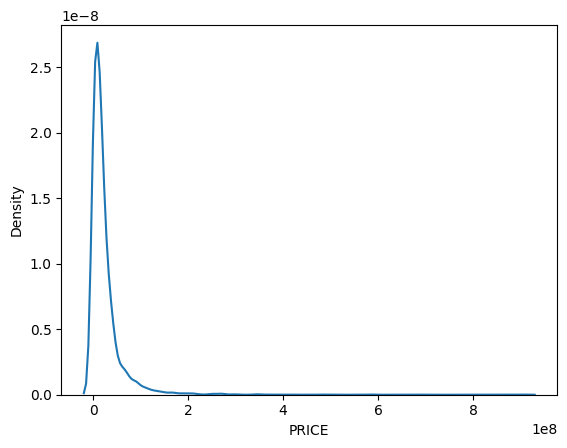

In [29]:
sns.kdeplot(df['PRICE'])

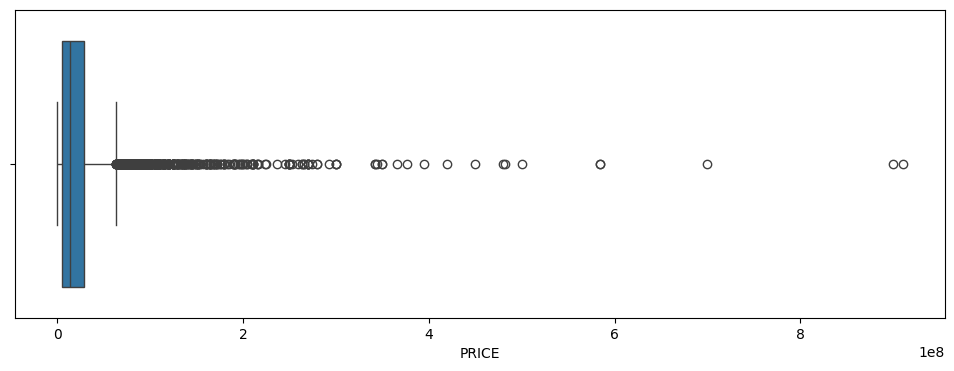

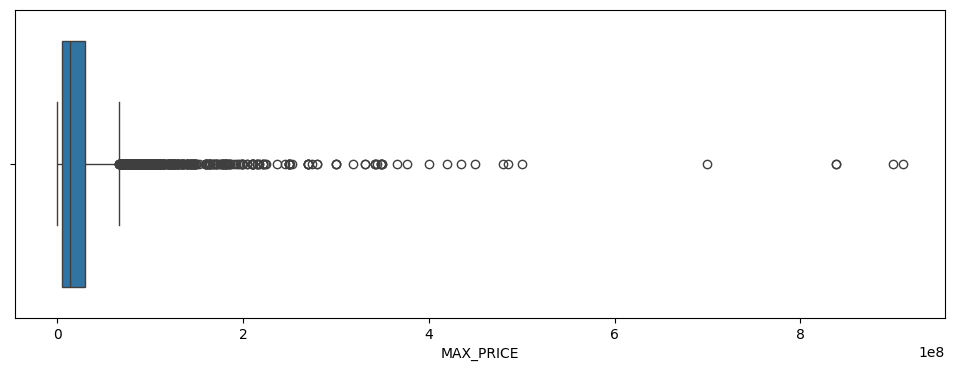

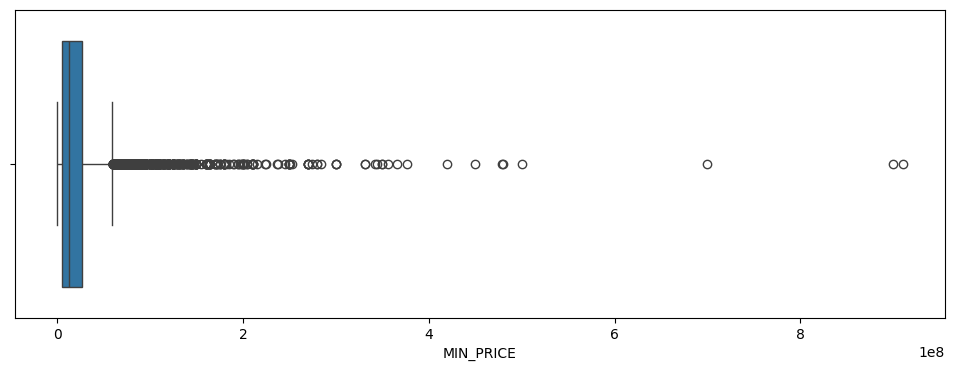

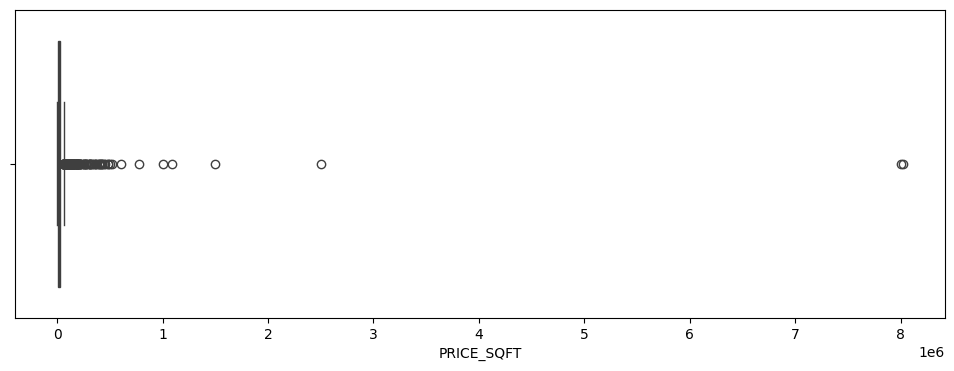

In [30]:
for col in price_cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[col])

## Area

### Clean Area

In [33]:
df['AREA'].sample(7)

5891    408-421  sq.ft.
6510    524-537  sq.ft.
7036         415 sq.ft.
8463         807 sq.ft.
7719         930 sq.ft.
5333         775 sq.ft.
7308         612 sq.ft.
Name: AREA, dtype: object

In [34]:
temp = df[df['AREA'].str.contains('sq.ft.', regex=False) == False]
print(temp.shape)
temp.head()

(0, 30)


,SPID,PROP_ID,CITY,PRICE,MAX_PRICE,MIN_PRICE,PRICE_SQFT,AREA,SECONDARY_AREA,MAX_AREA_SQFT,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM


#### Deal with ranged areas

> **Example:** `1638-1646  sq.ft.`

In [35]:
temp = df[df['AREA'].str.contains('-', regex=False) == True]['AREA']
print(temp.shape)
temp.head()

(2278,)


62      912-1127  sq.ft.
163    1073-1314  sq.ft.
186    1736-1846  sq.ft.
218      247-380  sq.ft.
230      582-631  sq.ft.
Name: AREA, dtype: object

In [36]:
temp_area_mean = temp.str.extract(r'(\d+)-(\d+)', expand=True).astype(float).mean(axis=1)
df.loc[temp.index, 'AREA'] = temp_area_mean.astype(str).add(' sq.ft.')

In [37]:
df.loc[temp.index, 'AREA']

62      1019.5 sq.ft.
163     1193.5 sq.ft.
186     1791.0 sq.ft.
218      313.5 sq.ft.
230      606.5 sq.ft.
            ...      
9502    1234.5 sq.ft.
9503     812.0 sq.ft.
9505     670.0 sq.ft.
9506     348.5 sq.ft.
9508     765.0 sq.ft.
Name: AREA, Length: 2278, dtype: object

In [38]:
df['AREA'] = df['AREA'].str.split(' ').str.get(0).astype(float)
df['AREA'].skew()

np.float64(66.28664013452979)

In [39]:
df[area_cols].dtypes

AREA                   float64
SECONDARY_AREA          object
MAX_AREA_SQFT          float64
MIN_AREA_SQFT          float64
PRICE_PER_UNIT_AREA    float64
dtype: object

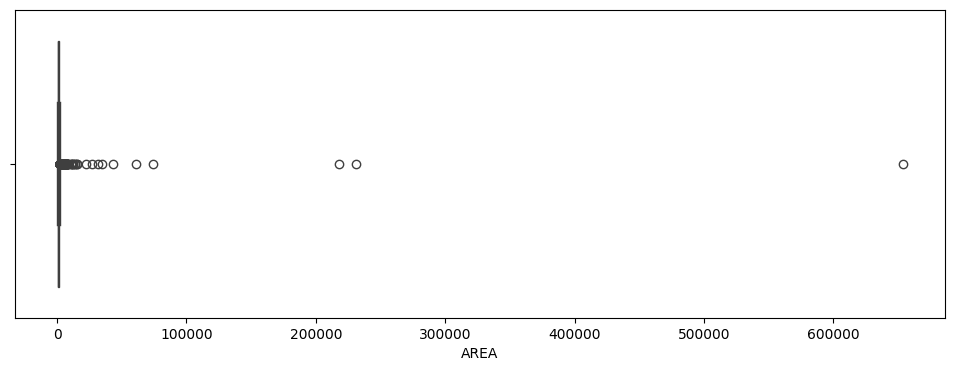

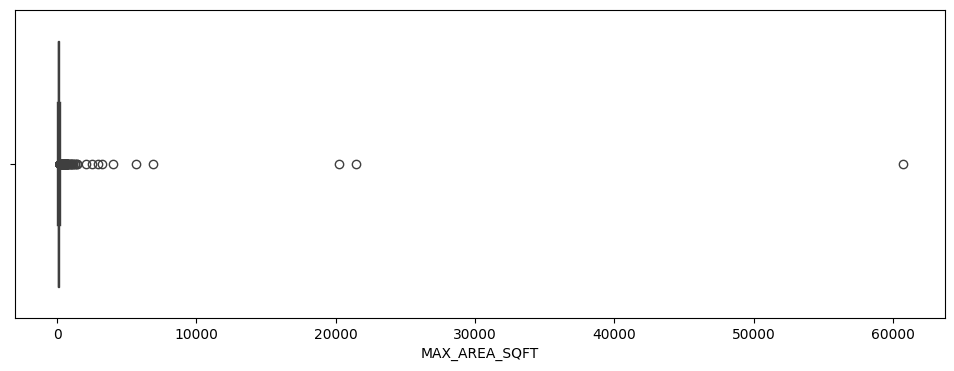

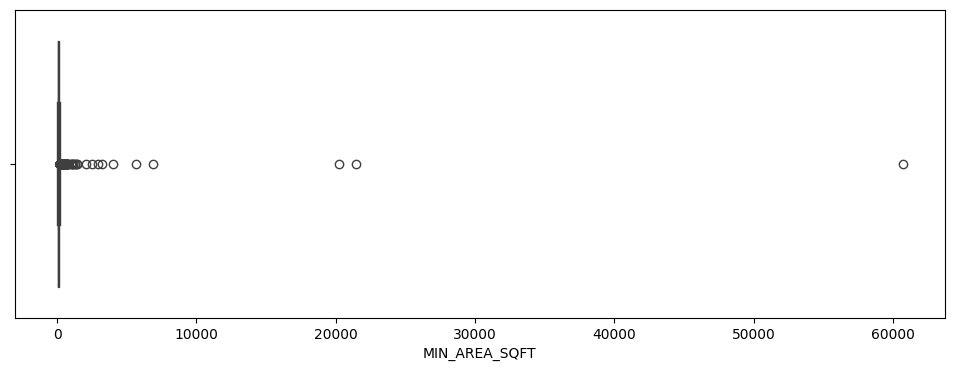

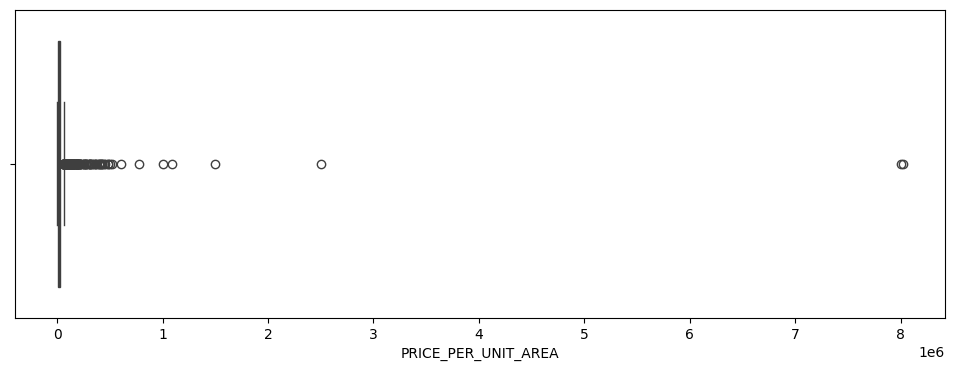

In [40]:
for col in area_cols:
    if 'SECONDARY_AREA' == col:
        continue

    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[col])

## Price and Area

In [41]:
df.shape

(7860, 30)

In [42]:
df[['AREA', 'PRICE']].describe()

,AREA,PRICE
count,7860.000000,7.860000e+03
mean,1219.177990,2.415062e+07
std,8324.656205,3.954215e+07
min,33.000000,4.000000e+03
25%,605.000000,5.399750e+06
50%,820.000000,1.390000e+07
75%,1209.250000,2.850000e+07
max,653399.000000,9.100000e+08


In [43]:
price_cols, area_cols

(['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT'],
 ['AREA',
  'SECONDARY_AREA',
  'MAX_AREA_SQFT',
  'MIN_AREA_SQFT',
  'PRICE_PER_UNIT_AREA'])

In [44]:
upper_qantile = 0.95
lower_qantile = 0.05


def clip_col(col: str) -> pd.Series:
    return df[col].clip(*df[col].quantile([lower_qantile, upper_qantile]))

<Axes: xlabel='AREA', ylabel='PRICE'>

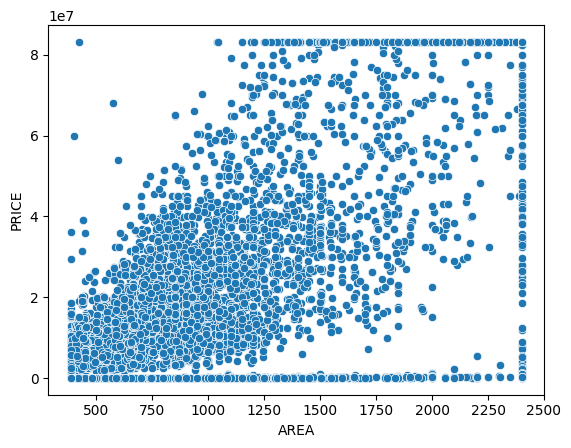

In [45]:
sns.scatterplot(x=clip_col('AREA'), y=clip_col('PRICE'))

<Axes: xlabel='PRICE_SQFT', ylabel='AREA'>

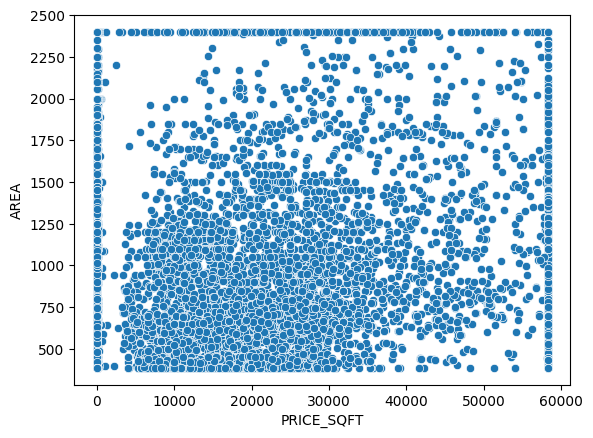

In [46]:
sns.scatterplot(x=clip_col('PRICE_SQFT'), y=clip_col('AREA'))

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

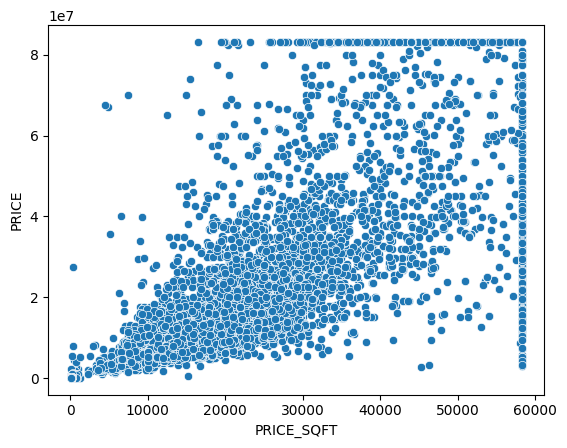

In [47]:
sns.scatterplot(x=clip_col('PRICE_SQFT'), y=clip_col('PRICE'))

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE'>

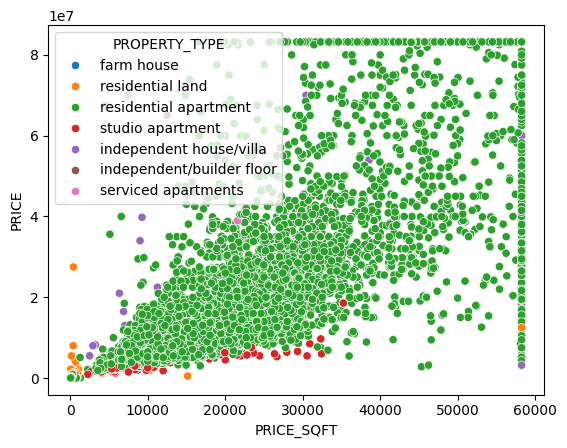

In [48]:
sns.scatterplot(x=clip_col('PRICE_SQFT'), y=clip_col('PRICE'), hue=df['PROPERTY_TYPE'])

<Axes: xlabel='PRICE_SQFT', ylabel='PRICE_PER_UNIT_AREA'>

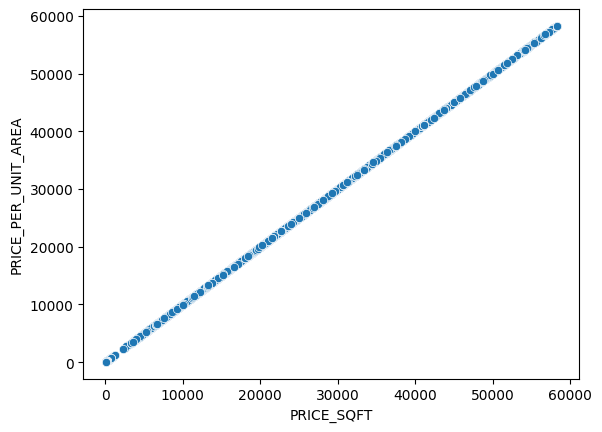

In [49]:
sns.scatterplot(x=clip_col('PRICE_SQFT'), y=clip_col('PRICE_PER_UNIT_AREA'))

## General Step - End

In [50]:
df.columns

Index(['SPID', 'PROP_ID', 'CITY', 'PRICE', 'MAX_PRICE', 'MIN_PRICE',
       'PRICE_SQFT', 'AREA', 'SECONDARY_AREA', 'MAX_AREA_SQFT',
       'MIN_AREA_SQFT', 'PRICE_PER_UNIT_AREA', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT', 'FORMATTED_LANDMARK_DETAILS', 'MAP_DETAILS',
       'PROP_HEADING', 'DESCRIPTION', 'PROPERTY_TYPE', 'location', 'FURNISH',
       'FACING', 'AGE', 'TOTAL_FLOOR', 'FEATURES', 'BEDROOM_NUM', 'AMENITIES',
       'PROP_NAME', 'BALCONY_NUM', 'FLOOR_NUM'],
      dtype='object')

In [51]:
price_cols, area_cols

(['PRICE', 'MAX_PRICE', 'MIN_PRICE', 'PRICE_SQFT'],
 ['AREA',
  'SECONDARY_AREA',
  'MAX_AREA_SQFT',
  'MIN_AREA_SQFT',
  'PRICE_PER_UNIT_AREA'])

In [52]:
drop_cols = [
    'MIN_PRICE',
    'MAX_PRICE',
    'MAX_AREA_SQFT',
    'MIN_AREA_SQFT',
    'SECONDARY_AREA',
    'PRICE_PER_UNIT_AREA',
]
df.drop(columns=drop_cols, inplace=True)

In [53]:
df.sample(3)

,SPID,PROP_ID,CITY,PRICE,PRICE_SQFT,AREA,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT,FORMATTED_LANDMARK_DETAILS,MAP_DETAILS,...,FURNISH,FACING,AGE,TOTAL_FLOOR,FEATURES,BEDROOM_NUM,AMENITIES,PROP_NAME,BALCONY_NUM,FLOOR_NUM
8768,68304274,o68304274,central mumbai suburbs,53000.0,78.0,888.0,[],15.0,"[{'text': '3 railway stations'}, {'text': '2 s...","{'latitude': '19.133902', 'longitude': '72.932...",...,4,3,6,52.0,"23,24,5,17,6,19,20,21",2.0,"5,17,20,21,23,24,6,19,101,102",runwal bliss,0.0,20
3885,58482132,m58482132,thane,25000.0,34.0,730.0,[],41.0,"[{'text': '1 shopping'}, {'text': '3 religious...","{'latitude': '19.26367', 'longitude': '72.9725...",...,4,5,1,29.0,"6,19,20,21",2.0,"20,21,6,19,101,102,103",rosa bella,3.0,11
9022,69980498,h69980498,navi mumbai,13000000.0,10833.0,1200.0,"['ready to move', 'resale']",50.0,"[{'text': '3 religious places'}, {'text': '1 a...","{'latitude': '19.047522', 'longitude': '73.077...",...,4,3,2,17.0,"44,23,45,24,46,25,47,26,29,30,31,33,12,17,39,1...",2.0,"17,5,20,21,44,23,45,24,46,47,29,30,39,19,1,6,9...",asian dream heights,4.0,3


### Export Dataset

In [54]:
df.to_csv('data/processed/mumbai.csv', index=False)